## This Notebook generates an image file for Figure 2
The figure is a frequency plot showing the number of fish assessed in the wild sampling events where fish were caught.

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
# define data location constants
DATA_DIR = Path('..') / 'source_data'
WILD_FISH_DATA = DATA_DIR / 'all_wild_fish_lice.csv'
WILD_EVENT_DATA = DATA_DIR / 'all_wild_sample_events.csv'

OUTPUT_DIR = Path('..') / 'output' / 'Figure_2'

## Format the data

In [3]:
# import and merge the data
events_df = pd.read_csv(WILD_EVENT_DATA, parse_dates=['sampledate'])
events_df['event_id'] = events_df['event_id'].astype(str)
fish_df = pd.read_csv(WILD_FISH_DATA)
fish_df['event_id'] = fish_df['event_id'].astype(str)

# merge on the right so we only get events where there were fish caught
wild_df = pd.merge(events_df, fish_df, on='event_id', how='right')

/tmp/ipykernel_15673/2291998140.py:4: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  fish_df = pd.read_csv(WILD_FISH_DATA)


In [4]:
wild_df.head()

,event_id,sampledate,region,dfozone,sample_site,latitude,longitude,source,source_code,fish_id,...,lep_unknown,cal_cop,cal_chal,cal_motile,cal_unknown,unknown_cop,unknown_chal,unknown_motile,unknown_unknown,lice_protocol
0,bc_5666,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
1,bc_5666,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
2,bc_5666,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,3,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
3,bc_5666,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal
4,bc_5666,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,MBC,5,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Lethal


In [5]:
# group by event and count the number of fish
wild_event_group = wild_df.groupby(['event_id'])
wild_num_fish_per_event_df = wild_event_group['fish_id'].agg('count').reset_index()

In [6]:
# rename fish_id column to 'fish_count' so it's clearer what it's for
wild_num_fish_per_event_df.rename(columns={'fish_id': 'fish_count'}, inplace=True)

wild_num_fish_per_event_df.head()

,event_id,fish_count
0,bc_1,8
1,bc_10,16
2,bc_10000,2
3,bc_10001,2
4,bc_10002,1


## Create the frequency plot

In [7]:
# configure seaborn
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize": (30, 15)})
sns.set_context("paper")
sns.set_palette('colorblind')

sns.set(font_scale=2.4) 

[Text(0.5, 0, 'Number of fish in sample'),
 Text(0, 0.5, 'Number of sampling events'),
 (0.0, 115.0),
 (1.0, 1200.0),

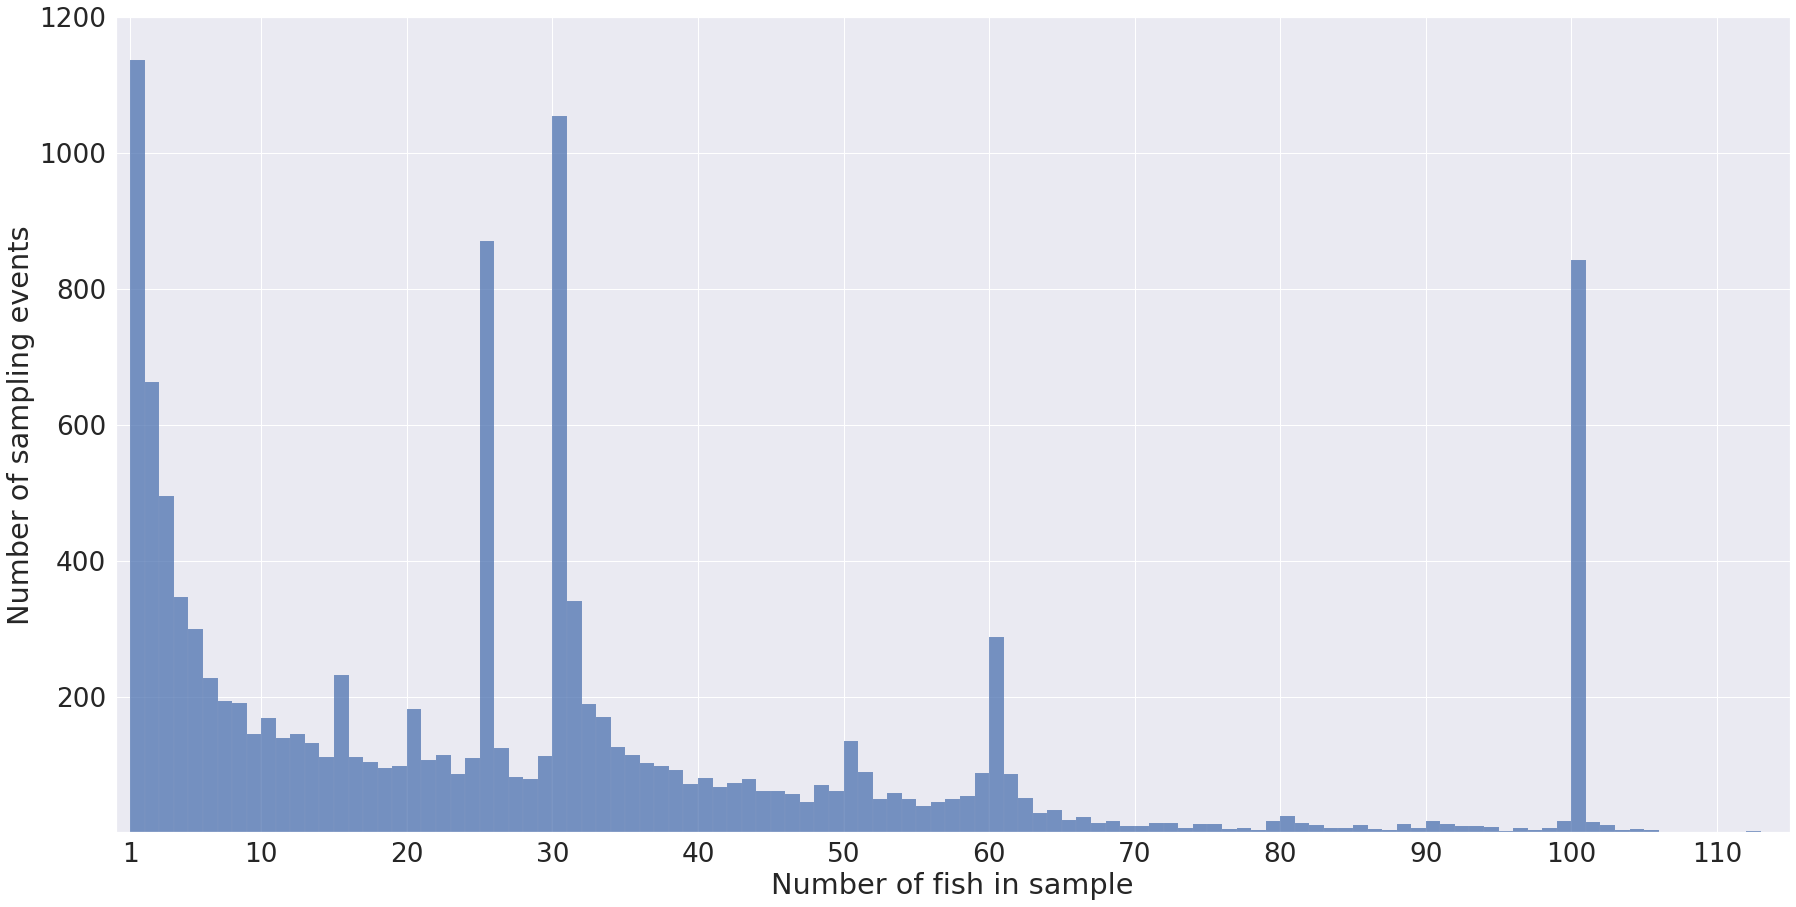

In [8]:
chart = sns.histplot(data=wild_num_fish_per_event_df, x='fish_count', binwidth=1)
chart.set(xlabel="Number of fish in sample", ylabel="Number of sampling events",  xlim=(0, 115), ylim=(1, 1200),
          xticks=[1] + list(range(10, 115, 10)))


In [9]:
chart.get_figure().savefig(OUTPUT_DIR / 'Fig2_wild_sample_freq.png', bbox_inches='tight')

In [10]:
# more than 115 fish in the events - not shown in the chart
wild_num_fish_per_event_df[wild_num_fish_per_event_df.fish_count > 115].sort_values('fish_count')

,event_id,fish_count
7818,bc_6635,116
7497,bc_6125,120
5662,bc_3606,123
7806,bc_6624,124
11947,scfs_375.0,126
6385,bc_4601,126
7822,bc_6639,129
7823,bc_6640,129
7809,bc_6627,130
7811,bc_6629,130
